In [21]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split

In [22]:
df= pd.read_csv('breast-cancer-wisconsin.txt')

In [23]:
print(df)

          Id   Clump   Size   Shape   Adhesion   EpiSize  Nuclei   Chromatin  \
0    1000025       5      1       1          1         2       1           3   
1    1002945       5      4       4          5         7      10           3   
2    1015425       3      1       1          1         2       2           3   
3    1016277       6      8       8          1         3       4           3   
4    1017023       4      1       1          3         2       1           3   
5    1017122       8     10      10          8         7      10           9   
6    1018099       1      1       1          1         2      10           3   
7    1018561       2      1       2          1         2       1           3   
8    1033078       2      1       1          1         2       1           1   
9    1033078       4      2       1          1         2       1           2   
10   1035283       1      1       1          1         1       1           3   
11   1036172       2      1       1     

In [24]:
df.replace('?', -99999, inplace=True)
df.drop(['Id'], 1, inplace=True)


In [27]:
X= np.array(df.drop([' Class'], 1))
Y= np.array(df[' Class'])

In [28]:
Xtrain, Xtest, Ytrain, Ytest= train_test_split(X, Y, test_size=0.2)
clf= neighbors.KNeighborsClassifier()

In [32]:
clf.fit(Xtrain, Ytrain)
import pickle
with open('kneighbors.pickle', 'wb') as f:
    pickle.dump(clf, f)

pickle_in= open('kneighbors.pickle', 'rb')
clf= pickle.load(pickle_in)

In [33]:
accuracy= clf.score(Xtest, Ytest)

print(accuracy)

0.9785714285714285


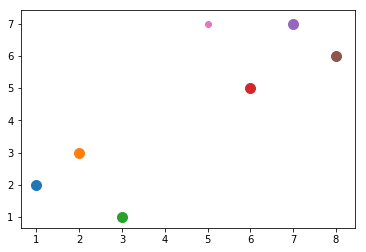

x


In [42]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from collections import Counter
import warnings
import pandas as pd
import random

dataset={'k':[[1,2], [2,3], [3, 1]], 'x':[[6, 5], [7, 7], [8, 6]]}
newfeatures=[5, 7]

[[plt.scatter(j[0], j[1], s=100) for j in dataset[i]]for i in dataset]
#dist=sqrt((plot1[0]-plot2[0])**2+(plot1[1]-plot2[1])**2)
plt.scatter(newfeatures[0], newfeatures[1])
plt.show()

def k_nearest(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set as a wrong choice')
    distances=[]
    for group in data:
        for features in data[group]:
            dist=np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([dist, group])
    
    votes=[i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence= Counter(votes).most_common(1)[0][1]/k
    
    return vote_result, confidence

result= k_nearest(dataset, newfeatures, k=3)
print(result)

In [51]:
df= pd.read_csv('breast-cancer-wisconsin.txt')
df.replace('?', -99999, inplace=True)
df.drop(['Id'], 1, inplace=True)
fulldata= df.astype(float).values.tolist()
random.shuffle(fulldata)

test_size=0.2
train_set= {2:[], 4:[]}
test_set= {2:[], 4:[]}
train_data=fulldata[:-int(test_size*len(fulldata))]
test_data=fulldata[-int(test_size*len(fulldata)):]
for i in train_data:
    train_set[i[-1]].append(i[:-1])
for i in test_data:
    test_set[i[-1]].append(i[:-1])


In [63]:
correct=0
total=0

for group in test_set:
    for data in test_set[group]:
        vote= k_nearest(train_set, data, k=5)
        if vote == group:
            correct += 1
        total+=1
        
print("Accuracy:", correct/total)        


Accuracy: 0.9640287769784173
